11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.8987 - loss: 0.3271 - val_accuracy: 0.9837 - val_loss: 0.0557
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9850 - loss: 0.0493 - val_accuracy: 0.9860 - val_loss: 0.0483
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9892 - val_loss: 0.0412
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9912 - val_loss: 0.0371
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.9908 - val_loss: 0.0337
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9874 - loss: 0.0371
Test Accuracy: 0.9905999898910522
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


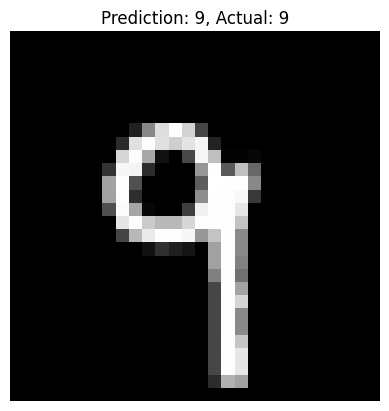

In [1]:
# 📦 STEP 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 📥 STEP 2: Load and Preprocess MNIST Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# CNN needs 4D shape: (samples, height, width, channels)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0

# 🧠 STEP 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ⚙️ STEP 4: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🚀 STEP 5: Train Model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# 📊 STEP 6: Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# 🔮 STEP 7: Predict and Visualize
import numpy as np
predictions = model.predict(X_test)

# Show sample
import random
i = random.randint(0, len(X_test)-1)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
plt.axis('off')
plt.show()
